In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c=3e8 # Velocidad de la luz (m/s)
h=6.621e-34 # Constante de Plank (J*s)
k=1.3807e-23 # Constante de Boltzman (J/K)
cte_wien=2.88e-3 # Constante Wien (m*k)

In [110]:
def I(x, T):
  l=x*1e-9
  a = 2.0*h*c**2*np.pi / l**5
  b = h*c / (l * k * T)
  return a / (np.exp(b) - 1)

In [121]:
x= np.linspace(0, 100000, 1000000) # [nm]
T=np.array([100, 5800, 120000])
intensity=np.array([I(x,i) for i in T])

<ipython-input-110-ce22ca0abde1>:3: RuntimeWarning: divide by zero encountered in divide
  a = 2.0*h*c**2*np.pi / l**5
<ipython-input-110-ce22ca0abde1>:4: RuntimeWarning: divide by zero encountered in divide
  b = h*c / (l * k * T)
<ipython-input-110-ce22ca0abde1>:5: RuntimeWarning: overflow encountered in exp
  return a / (np.exp(b) - 1)
<ipython-input-110-ce22ca0abde1>:5: RuntimeWarning: invalid value encountered in divide
  return a / (np.exp(b) - 1)


In [141]:
lambda_max=np.array([cte_wien/i for i in T])*1e9
color=np.array(["b","g","purple"])
limites=np.array([75000,3000,180])

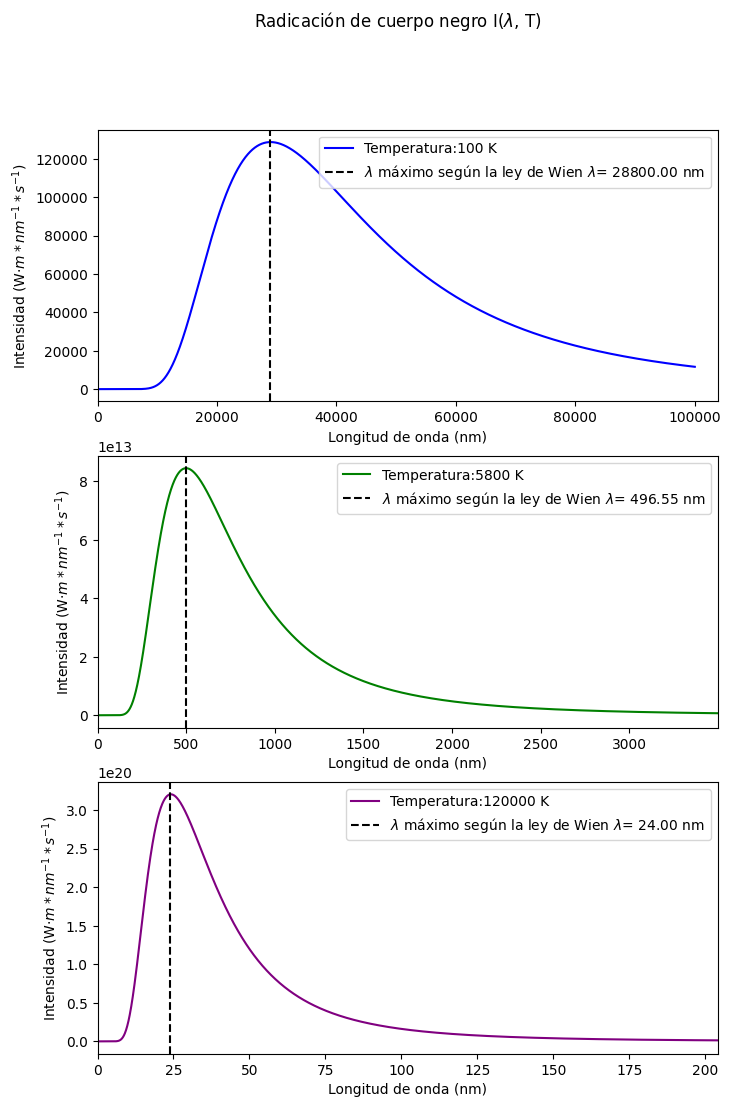

In [145]:
figure, ax= plt.subplots(3,1, figsize=(8,12))
for i in range(0,3):
  ax[i].plot(x,intensity[i],label=f"Temperatura:{T[i]} K", c=color[i])
  ax[i].axvline(lambda_max[i], ls="--", c="k", label=f"$\lambda$ máximo según la ley de Wien $\lambda$= {lambda_max[i]:.2f} nm")
  ax[i].legend()
  ax[i].set_xlabel("Longitud de onda (nm)")
  ax[i].set_ylabel("Intensidad (W·$m*nm^{-1}* s^{-1}$)")
  ax[i].set_xlim(0, lambda_max[i]+limites[i])
figure.suptitle("Radicación de cuerpo negro I($\lambda$, T)")
plt.savefig("Radiacion.jpeg")